# Buffering

In [1]:
import geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
clinics_df = geopandas.read_file('data/behavioralHealth.shp')

<AxesSubplot:>

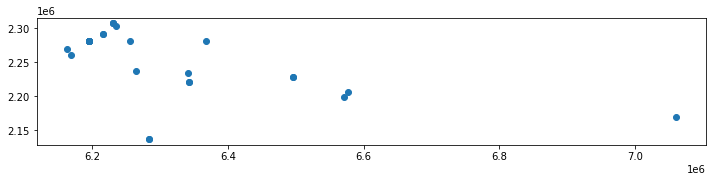

In [3]:
clinics_df.plot()

In [4]:
clinics_df.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS - 6
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
tracts_df = geopandas.read_file('data/california_tracts.shp')

<AxesSubplot:>

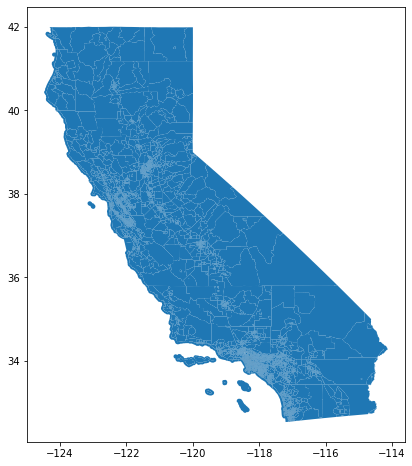

In [6]:
tracts_df.plot()

In [7]:
tracts_df.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

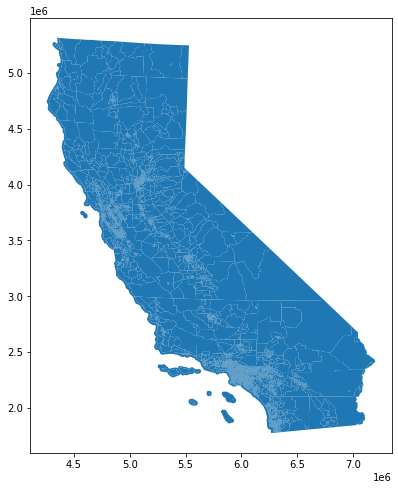

In [8]:
tracts_df.to_crs(clinics_df.crs).plot()

In [9]:
projected_tracts_df = tracts_df.to_crs(clinics_df.crs)

In [10]:
projected_tracts_df.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - California - SPCS - 6
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
projected_tracts_df.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry
0,06083002103,Census Tract 21.03,2838200.0,7603.0,+34.9306689,-120.4270588,3930,354,290,253,...,1469,476,993,1360,2492,2.86,2.51,0.069451,0.000281,"POLYGON ((5312327.624 2674039.218, 5312411.567..."
1,06083002402,Census Tract 24.02,16288573.0,44468.0,+34.9287963,-120.4780833,11406,1250,1099,969,...,2920,1444,1476,5161,6240,3.57,4.23,0.190631,0.001611,"POLYGON ((5295305.781 2668337.873, 5295187.436..."
2,06083002102,Census Tract 21.02,1352551.0,0.0,+34.9421111,-120.4267767,2084,156,141,139,...,739,433,306,1179,905,2.72,2.96,0.051289,0.000133,"POLYGON ((5312411.567 2674037.318, 5312327.624..."
3,06083002010,Census Tract 20.10,2417990.0,0.0,+34.8714281,-120.4100285,4375,215,264,341,...,1522,1303,219,3609,761,2.77,3.47,0.066269,0.000238,"POLYGON ((5313412.868 2652598.500, 5313429.545..."
4,06083002009,Census Tract 20.09,2603281.0,0.0,+34.8722878,-120.4277159,3826,170,232,318,...,1326,969,357,2730,1045,2.82,2.93,0.065523,0.000257,"POLYGON ((5309793.642 2652620.807, 5309994.138..."


FIPS: https://www.weather.gov/hnx/cafips

In [12]:
riverside_tracts = projected_tracts_df[projected_tracts_df.GEOID10.str.startswith('06065')]

<AxesSubplot:>

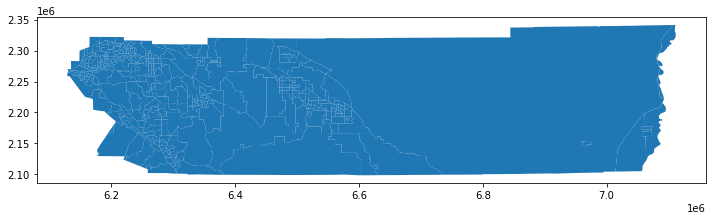

In [13]:
riverside_tracts.plot()

In [14]:
centroids = riverside_tracts.geometry.centroid # tract centroids

<AxesSubplot:>

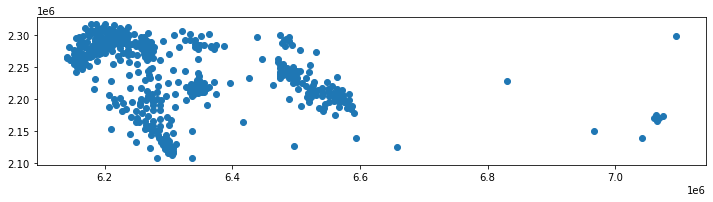

In [15]:
centroids.plot()

<AxesSubplot:>

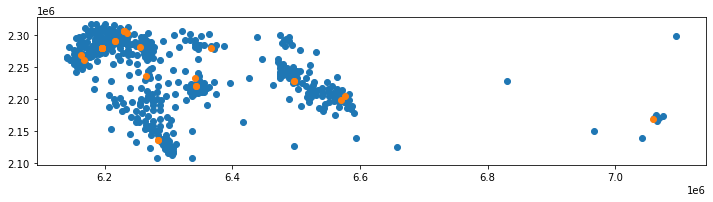

In [16]:
base = centroids.plot()
clinics_df.plot(ax=base)

In [17]:
clinic_buffer_3000 = clinics_df.buffer(3000)

<AxesSubplot:>

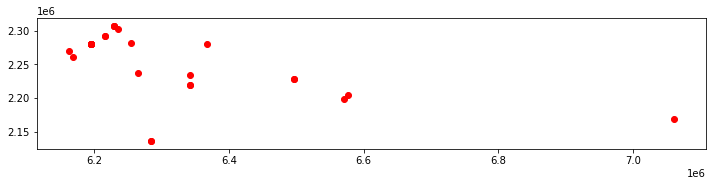

In [18]:
base = clinic_buffer_3000.plot()
clinics_df.plot(ax=base, color='red')

In [19]:
clinic_buffer_3000.geometry

0     POLYGON ((6219487.156 2291913.664, 6219472.710...
1     POLYGON ((6198566.226 2280519.190, 6198551.780...
2     POLYGON ((6171252.101 2261023.951, 6171237.656...
3     POLYGON ((7062944.605 2169652.046, 7062930.160...
4     POLYGON ((6198949.672 2280510.302, 6198935.226...
5     POLYGON ((6198566.226 2280519.190, 6198551.780...
6     POLYGON ((6258240.101 2281392.265, 6258225.655...
7     POLYGON ((6165865.861 2269381.489, 6165851.416...
8     POLYGON ((6198182.779 2280509.032, 6198168.333...
9     POLYGON ((6345387.266 2220024.356, 6345372.820...
10    POLYGON ((6198566.226 2280519.190, 6198551.780...
11    POLYGON ((6580094.185 2205388.907, 6580079.739...
12    POLYGON ((6198566.226 2280519.190, 6198551.780...
13    POLYGON ((6286871.161 2136729.378, 6286856.715...
14    POLYGON ((6232918.194 2307140.803, 6232903.748...
15    POLYGON ((6499477.603 2228753.546, 6499463.157...
16    POLYGON ((6345390.651 2220029.434, 6345376.206...
17    POLYGON ((6268042.293 2237006.918, 6268027

<AxesSubplot:>

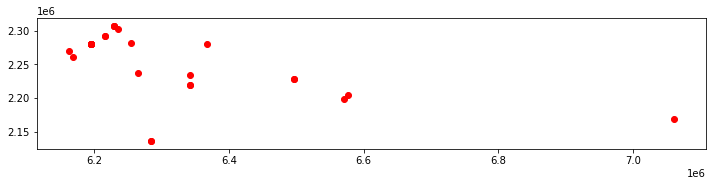

In [20]:
base = clinic_buffer_3000.plot()
clinics_df.plot(ax=base, color='red')

## What tracts intersect with one or more clinic buffers?

In [21]:
centroids = geopandas.GeoDataFrame(geometry=centroids)
clinic_buffer_3000 = geopandas.GeoDataFrame(geometry=clinic_buffer_3000)
centroids_intersecting = geopandas.sjoin(centroids, clinic_buffer_3000, how='inner', op='intersects')

In [22]:
centroids_intersecting.head()

,geometry,index_right
4004,POINT (6256227.479 2279557.781),6
4023,POINT (6568932.269 2200882.880),22
4044,POINT (6366300.777 2282906.517),20
4064,POINT (6366220.326 2281425.847),20
4201,POINT (6166023.946 2261459.603),2


In [23]:
centroids_intersecting.shape

(27, 2)

In [24]:
tracts_intersecting = geopandas.sjoin(riverside_tracts, clinic_buffer_3000, how='inner', op='intersects')

In [25]:
tracts_intersecting.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,index_right
3924,06065044916,Census Tract 449.16,2590298.0,0.0,+33.7942301,-116.4493910,4650,320,307,334,...,1000,825,2228,2422,2.23,2.94,0.063787,0.000252,"POLYGON ((6503701.722 2230045.508, 6503436.765...",15
3973,06065045000,Census Tract 450,3556744.0,115034.0,+33.7750205,-116.4698341,3424,215,170,143,...,838,663,1825,1599,2.18,2.41,0.087125,0.000357,"POLYGON ((6492940.364 2224762.455, 6492969.612...",15
4057,06065941100,Census Tract 9411,2212894.0,375109.0,+33.7959943,-116.4701978,2051,20,9,4,...,1144,159,1777,274,1.55,1.72,0.063846,0.000252,"POLYGON ((6493169.055 2233970.827, 6493131.280...",15
4059,06065940900,Census Tract 9409,2216014.0,354836.0,+33.7835901,-116.4514939,1916,29,23,32,...,932,140,1635,278,1.75,1.99,0.063702,0.000250,"POLYGON ((6503641.933 2224939.376, 6503640.997...",15
4372,06065045103,Census Tract 451.03,23060093.0,383373.0,+33.7425210,-116.4468892,3623,127,117,120,...,1218,662,2390,1233,1.96,1.86,0.271410,0.002281,"POLYGON ((6493219.353 2220826.651, 6493253.516...",15


In [26]:
tracts_intersecting.shape

(132, 196)

There are 132 cases of a tract intersecting a clinic buffer

## Create a new attribute for the tracts reporting the number of clinics within 3000 feet of the tract polygon

In [27]:
tracts_intersecting.groupby(by='GEOID10').count()

,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,DP0010005,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,index_right
GEOID10,,,,,,,,,,,,,,,,,,,,,
06065030101,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
06065030502,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
06065030603,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
06065031100,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
06065031200,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
06065051200,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
06065051300,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
06065940400,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [28]:
riverside_tracts.merge(tracts_intersecting.groupby(by='GEOID10').count()['index_right'], on="GEOID10")

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,index_right
0,06065044916,Census Tract 449.16,2590298.0,0.0,+33.7942301,-116.4493910,4650,320,307,334,...,1000,825,2228,2422,2.23,2.94,0.063787,0.000252,"POLYGON ((6503701.722 2230045.508, 6503436.765...",2
1,06065043401,Census Tract 434.01,3243409.0,0.0,+33.7475602,-116.9695083,5791,544,492,514,...,807,1024,2341,3330,2.90,3.25,0.072553,0.000316,"POLYGON ((6339639.925 2215242.601, 6339640.736...",2
2,06065031602,Census Tract 316.02,1739882.0,0.0,+33.9268256,-117.4484790,5314,427,435,404,...,805,794,2445,2663,3.04,3.35,0.057600,0.000170,"POLYGON ((6199282.756 2284266.792, 6199320.329...",7
3,06065042618,Census Tract 426.18,3403788.0,21084.0,+33.8217106,-117.2187833,8283,779,833,847,...,1357,484,5885,2303,4.34,4.76,0.080108,0.000334,"POLYGON ((6267612.391 2239137.351, 6267510.675...",1
4,06065042617,Census Tract 426.17,2320349.0,0.0,+33.8073433,-117.2145613,11436,1116,1112,1239,...,1622,1047,6848,4582,4.22,4.38,0.069471,0.000226,"POLYGON ((6267329.637 2239145.072, 6267345.129...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,06065045900,Census Tract 459,273579602.0,298988.0,+33.5281628,-114.6691382,1838,168,146,200,...,328,290,962,876,2.93,3.02,0.762484,0.026583,"POLYGON ((7056625.773 2105228.352, 7056554.404...",1
67,06065046103,Census Tract 461.03,7849131.0,0.0,+33.6249027,-114.5972328,3030,216,254,311,...,732,257,2167,820,2.96,3.19,0.133870,0.000763,"POLYGON ((7060783.746 2177503.961, 7060798.355...",1
68,06065040809,Census Tract 408.09,2391185.0,0.0,+33.8928291,-117.5555915,3353,251,256,292,...,779,231,2507,846,3.22,3.66,0.072830,0.000233,"POLYGON ((6161838.987 2270557.687, 6161808.554...",1
69,06065045103,Census Tract 451.03,23060093.0,383373.0,+33.7425210,-116.4468892,3623,127,117,120,...,1218,662,2390,1233,1.96,1.86,0.271410,0.002281,"POLYGON ((6493219.353 2220826.651, 6493253.516...",2


In [29]:
riverside_tracts.merge(tracts_intersecting.groupby(by='GEOID10').count()['index_right'], on="GEOID10", how='left')

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,index_right
0,06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,620,...,1142,826,3927,2299,3.44,2.78,0.095958,0.000262,"POLYGON ((6242951.622 2277488.508, 6242886.989...",NaN
1,06065041911,Census Tract 419.11,70257842.0,0.0,+33.7428832,-117.4957943,10258,840,844,806,...,2881,430,8710,1543,3.02,3.59,0.466106,0.006836,"POLYGON ((6178824.405 2237135.066, 6179337.569...",NaN
2,06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,447,...,1823,350,5177,1165,2.84,3.33,0.200974,0.001093,"POLYGON ((6181123.483 2246087.673, 6181145.150...",NaN
3,06065040816,Census Tract 408.16,1788821.0,0.0,+33.9024569,-117.5246107,2594,162,161,227,...,688,171,2133,451,3.10,2.64,0.082444,0.000174,"POLYGON ((6177774.413 2273794.098, 6177714.158...",NaN
4,06065040815,Census Tract 408.15,1266779.0,0.0,+33.8930776,-117.5114997,3586,231,235,257,...,756,399,2462,1124,3.26,2.82,0.050637,0.000123,"POLYGON ((6181173.706 2272438.849, 6181259.909...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,06065043307,Census Tract 433.07,3647361.0,0.0,+33.7246399,-116.9786785,5872,407,364,389,...,1343,1125,2949,2768,2.20,2.46,0.077987,0.000355,"POLYGON ((6343593.853 2208132.507, 6343591.581...",NaN
449,06065043313,Census Tract 433.13,1432435.0,0.0,+33.7338858,-116.9506407,3504,315,294,341,...,539,442,1764,1736,3.27,3.93,0.055297,0.000139,"POLYGON ((6346249.209 2213753.387, 6346322.775...",NaN
450,06065043703,Census Tract 437.03,1222620.0,94988.0,+33.7539539,-116.9005782,2585,187,177,193,...,664,269,1658,925,2.50,3.44,0.059906,0.000128,"POLYGON ((6365460.654 2215024.575, 6365472.163...",NaN
451,06065043405,Census Tract 434.05,1723621.0,0.0,+33.7502798,-116.9865118,4217,308,266,257,...,1137,743,2158,2058,1.90,2.77,0.066749,0.000168,"POLYGON ((6336997.468 2218581.854, 6336997.552...",2.0


In [30]:
riverside_tracts.shape

(453, 195)

So the left merge makes sure all the original tracts are included in the merge, even if they do not intersect with a buffer. In those cases a `NaN` is inserted.

We can replace the `NaN` values with `0`s.

In [31]:
riverside_tracts.merge(tracts_intersecting.groupby(by='GEOID10').count()['index_right'], on="GEOID10", how='left').fillna(0)

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,index_right
0,06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,620,...,1142,826,3927,2299,3.44,2.78,0.095958,0.000262,"POLYGON ((6242951.622 2277488.508, 6242886.989...",0.0
1,06065041911,Census Tract 419.11,70257842.0,0.0,+33.7428832,-117.4957943,10258,840,844,806,...,2881,430,8710,1543,3.02,3.59,0.466106,0.006836,"POLYGON ((6178824.405 2237135.066, 6179337.569...",0.0
2,06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,447,...,1823,350,5177,1165,2.84,3.33,0.200974,0.001093,"POLYGON ((6181123.483 2246087.673, 6181145.150...",0.0
3,06065040816,Census Tract 408.16,1788821.0,0.0,+33.9024569,-117.5246107,2594,162,161,227,...,688,171,2133,451,3.10,2.64,0.082444,0.000174,"POLYGON ((6177774.413 2273794.098, 6177714.158...",0.0
4,06065040815,Census Tract 408.15,1266779.0,0.0,+33.8930776,-117.5114997,3586,231,235,257,...,756,399,2462,1124,3.26,2.82,0.050637,0.000123,"POLYGON ((6181173.706 2272438.849, 6181259.909...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,06065043307,Census Tract 433.07,3647361.0,0.0,+33.7246399,-116.9786785,5872,407,364,389,...,1343,1125,2949,2768,2.20,2.46,0.077987,0.000355,"POLYGON ((6343593.853 2208132.507, 6343591.581...",0.0
449,06065043313,Census Tract 433.13,1432435.0,0.0,+33.7338858,-116.9506407,3504,315,294,341,...,539,442,1764,1736,3.27,3.93,0.055297,0.000139,"POLYGON ((6346249.209 2213753.387, 6346322.775...",0.0
450,06065043703,Census Tract 437.03,1222620.0,94988.0,+33.7539539,-116.9005782,2585,187,177,193,...,664,269,1658,925,2.50,3.44,0.059906,0.000128,"POLYGON ((6365460.654 2215024.575, 6365472.163...",0.0
451,06065043405,Census Tract 434.05,1723621.0,0.0,+33.7502798,-116.9865118,4217,308,266,257,...,1137,743,2158,2058,1.90,2.77,0.066749,0.000168,"POLYGON ((6336997.468 2218581.854, 6336997.552...",2.0


In [32]:
riverside_tracts.merge(tracts_intersecting.groupby(by='GEOID10').count()['index_right'], on="GEOID10", how='left').fillna(0).rename(columns={'index_right':'clinics'})

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry,clinics
0,06065042012,Census Tract 420.12,2687173.0,0.0,+33.9108776,-117.3205065,6242,420,545,620,...,1142,826,3927,2299,3.44,2.78,0.095958,0.000262,"POLYGON ((6242951.622 2277488.508, 6242886.989...",0.0
1,06065041911,Census Tract 419.11,70257842.0,0.0,+33.7428832,-117.4957943,10258,840,844,806,...,2881,430,8710,1543,3.02,3.59,0.466106,0.006836,"POLYGON ((6178824.405 2237135.066, 6179337.569...",0.0
2,06065041910,Census Tract 419.10,11167489.0,64225.0,+33.7892199,-117.4949771,6342,404,453,447,...,1823,350,5177,1165,2.84,3.33,0.200974,0.001093,"POLYGON ((6181123.483 2246087.673, 6181145.150...",0.0
3,06065040816,Census Tract 408.16,1788821.0,0.0,+33.9024569,-117.5246107,2594,162,161,227,...,688,171,2133,451,3.10,2.64,0.082444,0.000174,"POLYGON ((6177774.413 2273794.098, 6177714.158...",0.0
4,06065040815,Census Tract 408.15,1266779.0,0.0,+33.8930776,-117.5114997,3586,231,235,257,...,756,399,2462,1124,3.26,2.82,0.050637,0.000123,"POLYGON ((6181173.706 2272438.849, 6181259.909...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,06065043307,Census Tract 433.07,3647361.0,0.0,+33.7246399,-116.9786785,5872,407,364,389,...,1343,1125,2949,2768,2.20,2.46,0.077987,0.000355,"POLYGON ((6343593.853 2208132.507, 6343591.581...",0.0
449,06065043313,Census Tract 433.13,1432435.0,0.0,+33.7338858,-116.9506407,3504,315,294,341,...,539,442,1764,1736,3.27,3.93,0.055297,0.000139,"POLYGON ((6346249.209 2213753.387, 6346322.775...",0.0
450,06065043703,Census Tract 437.03,1222620.0,94988.0,+33.7539539,-116.9005782,2585,187,177,193,...,664,269,1658,925,2.50,3.44,0.059906,0.000128,"POLYGON ((6365460.654 2215024.575, 6365472.163...",0.0
451,06065043405,Census Tract 434.05,1723621.0,0.0,+33.7502798,-116.9865118,4217,308,266,257,...,1137,743,2158,2058,1.90,2.77,0.066749,0.000168,"POLYGON ((6336997.468 2218581.854, 6336997.552...",2.0


In [33]:
riverside_tracts_clinics = riverside_tracts.merge(tracts_intersecting.groupby(by='GEOID10').count()['index_right'], on="GEOID10", how='left').fillna(0).rename(columns={'index_right':'clinics'})

/home/serge/anaconda3/envs/teaching/lib/python3.8/site-packages/mapclassify/classifiers.py:234: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/home/serge/anaconda3/envs/teaching/lib/python3.8/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

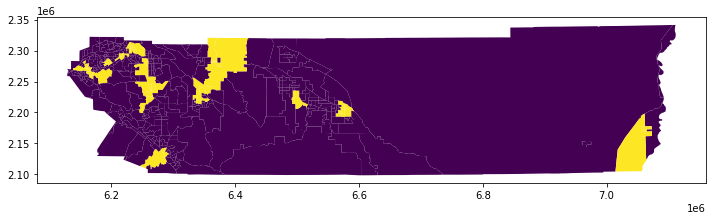

In [34]:
riverside_tracts_clinics.plot(column='clinics', scheme='Quantiles')

<AxesSubplot:>

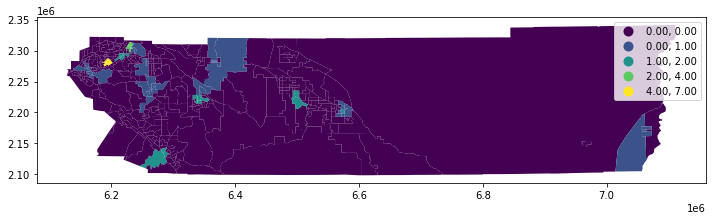

In [35]:
riverside_tracts_clinics.plot(column='clinics', scheme='FisherJenks', k=5, legend=True)

## Order matters

Note that it could be that a single clinic buffer intersects with more than a single tract.

In [36]:
clinics_intersecting = geopandas.sjoin(clinic_buffer_3000, riverside_tracts, how='left', op='intersects')

In [37]:
clinics_intersecting.shape

(132, 196)

In [38]:
clinics_df.shape

(28, 8)

There are only 28 clinics, each with a buffer. But there are 132 intersections involving a buffer and a tract

In [39]:
clinics_intersecting.head()

,geometry,index_right,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,...,DP0200001,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area
0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4077,06065031401,Census Tract 314.01,2264167.0,0.0,+33.9380023,-117.4081832,6702,559,...,6.4,2151,962,1189,3051,3634,3.17,3.06,0.082205,0.000221
0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4075,06065031200,Census Tract 312,3864549.0,0.0,+33.9429752,-117.3825351,6878,410,...,4.1,2122,1523,599,4649,2090,3.05,3.49,0.079591,0.000377
0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4051,06065030603,Census Tract 306.03,3562233.0,0.0,+33.9557504,-117.3611853,2978,105,...,1.1,1070,983,87,2552,291,2.60,3.34,0.102277,0.000347
0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4314,06065031100,Census Tract 311,2897578.0,0.0,+33.9549035,-117.3909919,4584,349,...,10.3,1613,905,708,2350,2069,2.60,2.92,0.075878,0.000283
1,"POLYGON ((6198566.226 2280519.190, 6198551.780...",4313,06065041407,Census Tract 414.07,1614720.0,0.0,+33.9110608,-117.4726363,5830,508,...,4.1,1784,722,1062,2551,3253,3.53,3.06,0.052605,0.000157


here the index is the index of the clinic buffer, and we see the first index, 0, repeats 4 times.

In [40]:
clinics_intersecting['clinic'] = clinics_intersecting.index
clinics_intersecting.reset_index(level=0, inplace=True)

In [41]:
clinics_intersecting.head()

,index,geometry,index_right,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinic
0,0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4077,06065031401,Census Tract 314.01,2264167.0,0.0,+33.9380023,-117.4081832,6702,...,2151,962,1189,3051,3634,3.17,3.06,0.082205,0.000221,0
1,0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4075,06065031200,Census Tract 312,3864549.0,0.0,+33.9429752,-117.3825351,6878,...,2122,1523,599,4649,2090,3.05,3.49,0.079591,0.000377,0
2,0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4051,06065030603,Census Tract 306.03,3562233.0,0.0,+33.9557504,-117.3611853,2978,...,1070,983,87,2552,291,2.60,3.34,0.102277,0.000347,0
3,0,"POLYGON ((6219487.156 2291913.664, 6219472.710...",4314,06065031100,Census Tract 311,2897578.0,0.0,+33.9549035,-117.3909919,4584,...,1613,905,708,2350,2069,2.60,2.92,0.075878,0.000283,0
4,1,"POLYGON ((6198566.226 2280519.190, 6198551.780...",4313,06065041407,Census Tract 414.07,1614720.0,0.0,+33.9110608,-117.4726363,5830,...,1784,722,1062,2551,3253,3.53,3.06,0.052605,0.000157,1


In [42]:
clinics_intersecting.groupby(by='index').count()

,geometry,index_right,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinic
index,,,,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [43]:
clinics_intersecting = clinics_intersecting.groupby(by='index').count()

In [44]:
clinics_intersecting.head()

,geometry,index_right,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinic
index,,,,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [45]:
clinics_intersecting['tracts'] = clinics_intersecting.index_right

In [46]:
clinics_intersecting.head()

,geometry,index_right,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,...,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,clinic,tracts
index,,,,,,,,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [47]:
clinics_df.merge(clinics_intersecting[['tracts']], left_index=True, right_index=True)

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry,tracts
0,149.0,Behavioral Health,Older Adult Services,6355 Riverside Ave,Riverside,92506,951-369-0219,POINT (6216487.156 2291913.664),4
1,150.0,Behavioral Health,Children'S Treatment Services,9990 County Farm Rd,Riverside,92503,951-358-4840,POINT (6195566.226 2280519.190),6
2,151.0,Behavioral Health,"Family, Adolescent, And Children'S Treatment",1195 Magnolia Ave,Corona,91719,951-273-0608,POINT (6168252.101 2261023.951),4
3,447.0,Behavioral Health,Blythe Clinic,1297 W Hobson Way,Blythe,92225,760-770-2222,POINT (7059944.605 2169652.046),4
4,152.0,Behavioral Health,Interagency Services For Families,9890 County Farm Rd,Riverside,92503,951-358-4850,POINT (6195949.672 2280510.302),4
5,448.0,Behavioral Health,Children'S Evaluation Services Unite,9990 County Farm Rd,Riverside,92503,951-358-7380,POINT (6195566.226 2280519.190),6
6,153.0,Behavioral Health,Children'S Interagency Program,23119 Cottonwood Ave,Moreno Valley,92553,951-413-5678,POINT (6255240.101 2281392.265),6
7,449.0,Behavioral Health,Substance Abuse Outpatient Program,623 N Main St,Corona,92880,951-737-2962,POINT (6162865.861 2269381.489),4
8,154.0,Behavioral Health,Van Horn Counseling Center,10000 County Farm Rd,Riverside,92503,951-358-4390,POINT (6195182.779 2280509.032),6
9,450.0,Behavioral Health,Substance Abuse Outpatient Program,650 N State St,Hemet,92543,951-791-3350,POINT (6342387.266 2220024.356),5


In [48]:
clinics_df = clinics_df.merge(clinics_intersecting[['tracts']], left_index=True, right_index=True)

<AxesSubplot:>

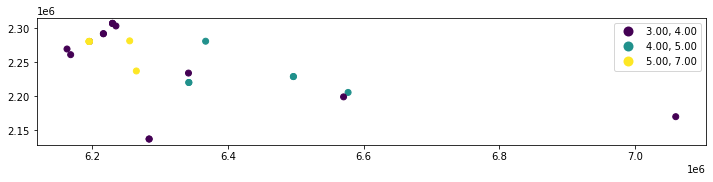

In [49]:
clinics_df.plot(column='tracts', scheme='Quantiles', k=3, legend=True)